In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv("OSX_DS_assignment.csv",header=0)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103322 entries, 0 to 103321
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_name           79191 non-null   object 
 1   country             103283 non-null  object 
 2   review_title        103322 non-null  object 
 3   review_description  103322 non-null  object 
 4   designation         73686 non-null   object 
 5   points              103322 non-null  int64  
 6   price               96359 non-null   float64
 7   province            103283 non-null  object 
 8   region_1            87254 non-null   object 
 9   region_2            44863 non-null   object 
 10  winery              103322 non-null  object 
 11  variety             103322 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ MB


In [4]:
del df1["user_name"]
del df1["review_description"]
del df1["designation"]
del df1["region_2"]
del df1["review_title"]

In [5]:
df1["points"]=df1["points"].fillna(df1["points"].mean())
df1["price"]=df1["price"].fillna(df1["price"].mean())

In [6]:
df=df1.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87254 entries, 0 to 103321
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   87254 non-null  object 
 1   points    87254 non-null  int64  
 2   price     87254 non-null  float64
 3   province  87254 non-null  object 
 4   region_1  87254 non-null  object 
 5   winery    87254 non-null  object 
 6   variety   87254 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [11]:
from  sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df["country"]=enc.fit_transform(df["country"])
df["region_1"]=enc.fit_transform(df["region_1"])
df["province"]=enc.fit_transform(df["province"])
df["province"]=enc.fit_transform(df["province"])
df["winery"]=enc.fit_transform(df["winery"])

<ipython-input-11-2ed1e625f947>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"]=enc.fit_transform(df["country"])
<ipython-input-11-2ed1e625f947>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region_1"]=enc.fit_transform(df["region_1"])
<ipython-input-11-2ed1e625f947>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [12]:
df.shape

(87254, 7)

In [13]:
df.describe()

,country,points,price,province,region_1,winery
count,87254.000000,87254.000000,87254.000000,87254.000000,87254.000000,87254.000000
mean,4.716322,88.598861,38.541657,24.404199,520.821853,6702.740780
std,1.634802,3.106174,42.813032,21.030439,320.625083,3711.381353
min,0.000000,80.000000,4.000000,0.000000,0.000000,0.000000
25%,3.000000,86.000000,19.000000,8.000000,187.000000,3661.000000
50%,6.000000,88.000000,30.000000,8.000000,545.000000,7030.000000
75%,6.000000,91.000000,45.000000,43.000000,797.000000,9884.000000
max,6.000000,100.000000,3300.000000,62.000000,1055.000000,12804.000000


In [14]:
X = df.loc[:,df.columns!="variety"]

In [15]:
y1 = df["variety"]

In [16]:
y=y1.to_frame()

In [17]:
X.shape,y.shape

((87254, 6), (87254, 1))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y1,test_size=0.2,random_state=0)

In [20]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [21]:
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [23]:
y_test_pred

array(['Nebbiolo', 'Red Blend', 'Pinot Noir', ..., 'Pinot Noir', 'Gamay',
       'Bordeaux-style Red Blend'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
accuracy_score(y_test, y_test_pred)

0.3011861784424961

In [26]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= X_train.columns, filled = True)

In [27]:
from IPython.display import Image

In [28]:
import pydotplus

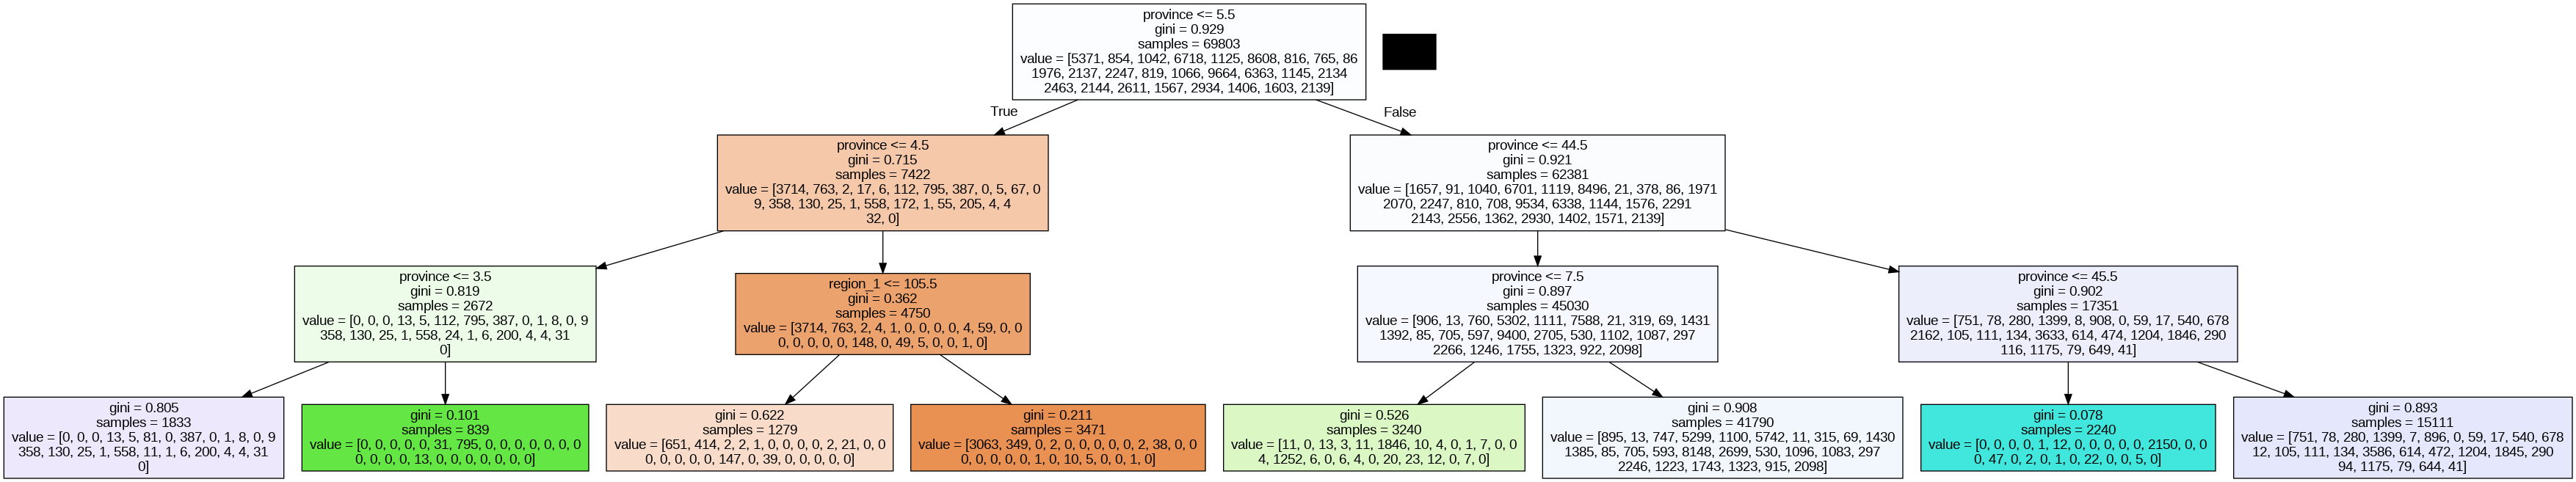

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

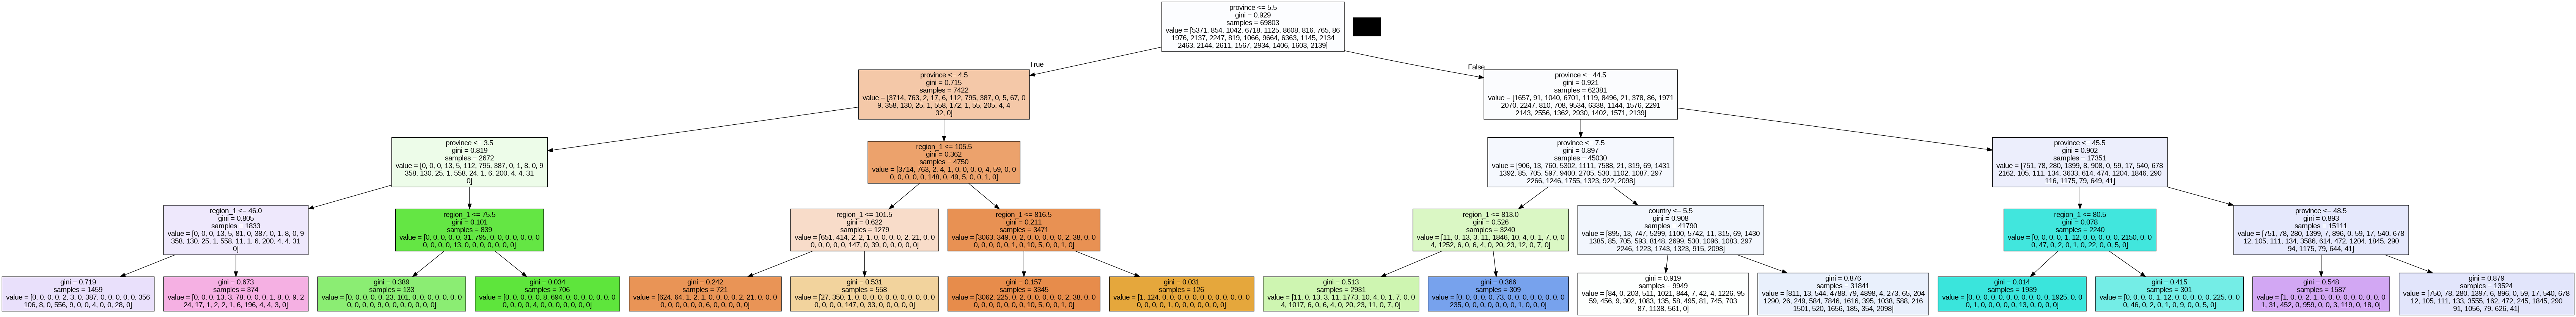

In [30]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1 ,random_state=42)

In [33]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [34]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[1050,   16,   10,  101,    0,   14,    0,    0,    0,   13,   13,
           0,    0,    2,   11,   30,    7,    2,    3,    4,    2,    1,
          29,    0,    3,    3],
       [  55,  141,    0,    3,    0,    1,    0,    0,    0,    1,    0,
           0,    0,    0,    0,    4,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [   9,    0,   80,   35,    0,   19,    0,    2,    0,   14,   11,
           1,    0,    1,   14,   17,    2,    9,    7,    1,    4,    1,
          17,    0,    1,    4],
       [  40,    0,   21,  964,    2,  108,    0,    0,    0,   70,   58,
           0,    6,    1,   42,   77,   10,   13,   10,    7,   37,    8,
          61,    8,    8,   74],
       [   1,    0,    0,    0,  220,   17,    0,    0,    0,    1,    0,
           0,    1,    0,    8,    0,    0,    1,    1,    0,    1,    2,
           0,    0,    1,    0],
       [  13,    1,    8,  103,   34, 1202,    5,    5,    1,   29,   40,
           1,   23,  

In [35]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6248925563004986

In [46]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)